# Homework 2

## Item-10

### Implement a Random Forest

#### Objective:
Train a forest using scikit-learn on the original Fatigue data set
#### Steps:
* Read the dataset
* Train your regressor (not classifier)
* Predict for validation dataset and compute RMSE for training and validation
dataset as a function of number of trees

In [3]:
import pandas as pd 
import numpy as np
import os

In [4]:
# Load the Fatigue dataset
base_path = r"C:\Users\ayber\OneDrive\Masaüstü\ML"

data_path = os.path.join(base_path, "Data/external/Fatigue_data.csv")
df=pd.read_csv(data_path).copy()
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [5]:
target='Fatigue'
X = df.drop(columns=['Sl. No.', target]).copy()
y = df[target].copy()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Range of trees to test
n_trees_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

# Store results
train_rmses = []
val_rmses = []


print(f"{'Trees':<10}  {'Train RMSE':<15}  {'Val RMSE':<15}")

# Loop over different number of trees
for n_trees in n_trees_range:
    # Initialize Regressor
    rf = RandomForestRegressor(
        n_estimators=n_trees,
        random_state=2,
        n_jobs=-1  
    )
    
    # Train
    rf.fit(X_train, y_train)
    
    # Predict
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_val)
    
    # Compute RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Store results
    train_rmses.append(rmse_train)
    val_rmses.append(rmse_val)
    
    print(f"{n_trees:<10}  {rmse_train:<15.4f}  {rmse_val:<15.4f}")

Trees       Train RMSE       Val RMSE       
1           27.6219          31.5652        
2           19.7205          28.7340        
4           15.9793          28.4509        
8           13.5898          27.9023        
16          11.8532          27.3904        
32          11.2787          25.9670        
64          10.8548          25.8434        
128         10.6127          25.2198        
256         10.5183          25.3630        


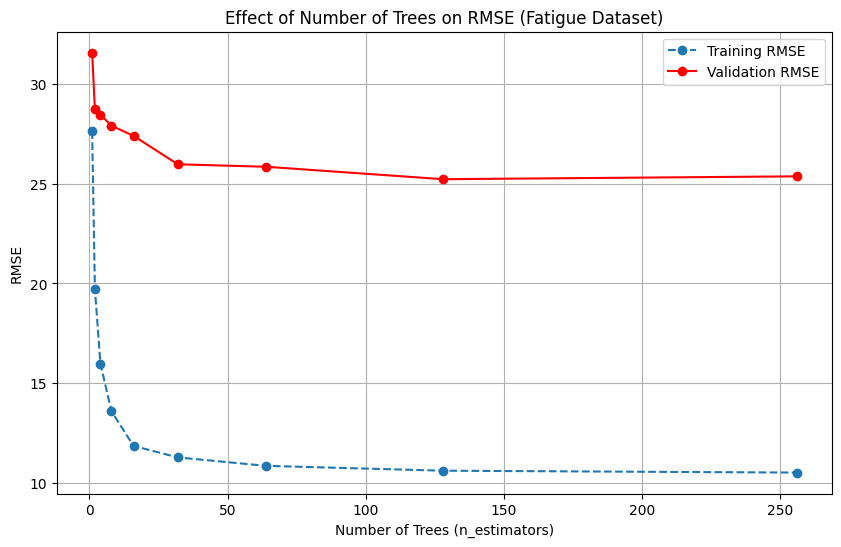

In [9]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, train_rmses, label='Training RMSE', marker='o', linestyle='--')
plt.plot(n_trees_range, val_rmses, label='Validation RMSE', marker='o', color='red')

plt.title('Effect of Number of Trees on RMSE (Fatigue Dataset)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

## Item-11

### Implement Gradient Boosting

#### Objective:
Train a forest using scikit-learn and xgboost on the “Fatigue” (good vs. bad) data
set
#### Steps:
* Read the dataset
* Train your classifier and analyze parameters
* Compute AUC score for different parameters

In [10]:
# Prepare X and y
X = df.drop(columns=['Sl. No.', target]).copy()
y_reg = df[target].to_numpy()
y = (y_reg > 500).astype(int)     # 1=Good Fatigue Life, 0=Bad

pd.Series(y).value_counts()

1    233
0    204
Name: count, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [13]:
# We will test how Learning Rate affects AUC for both libraries
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
results = []

print(f"{'Library':<10}  {'LR':<5}  {'AUC Score':<10}")

# Gradient Boosting Classifier (Sklearn)
for lr in learning_rates:
    # Initialize
    gb_clf = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    
    # Train
    gb_clf.fit(X_train, y_train)
    
    # Predict Probability (AUC requires probabilities, not hard class labels)
    y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]
    
    # Score
    auc = roc_auc_score(y_test, y_pred_proba)
    results.append({'Library': 'Sklearn', 'LR': lr, 'AUC': auc})
    print(f"{'Sklearn':<10}  {lr:<5}  {auc:.4f}")


# Xgboost Classifier
for lr in learning_rates:
    # Initialize
    xgb_clf = XGBClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        eval_metric='logloss',
        random_state=42
    )
    
    # Train
    xgb_clf.fit(X_train, y_train)
    
    # Predict Probability
    y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
    
    # Score
    auc = roc_auc_score(y_test, y_pred_proba)
    results.append({'Library': 'XGBoost', 'LR': lr, 'AUC': auc})
    print(f"{'XGBoost':<10}  {lr:<5}  {auc:.4f}")

Library     LR     AUC Score 
Sklearn     0.01   0.9744
Sklearn     0.05   0.9799
Sklearn     0.1    0.9819
Sklearn     0.2    0.9814
Sklearn     0.5    0.9809
XGBoost     0.01   0.9734
XGBoost     0.05   0.9855
XGBoost     0.1    0.9892
XGBoost     0.2    0.9886
XGBoost     0.5    0.9866


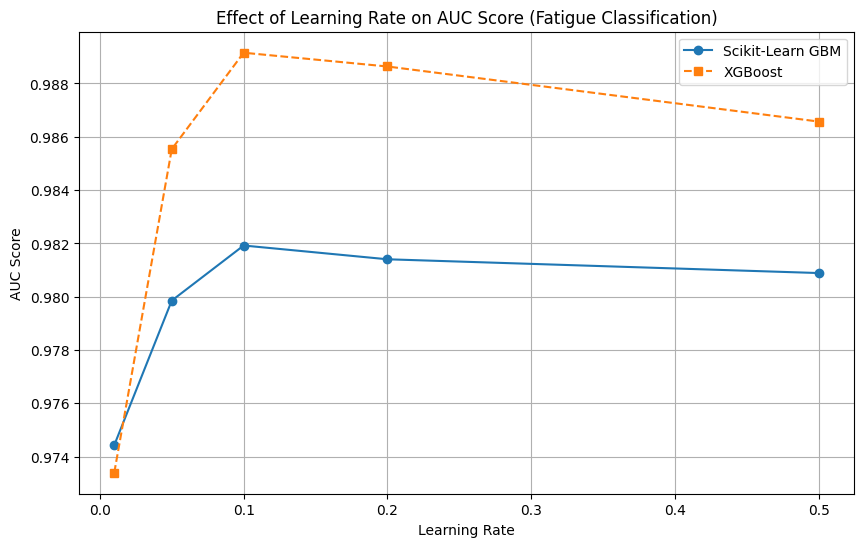

In [14]:
# Visualization
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))

# Plot Sklearn
sk_data = results_df[results_df['Library'] == 'Sklearn']
plt.plot(sk_data['LR'], sk_data['AUC'], marker='o', label='Scikit-Learn GBM')

# Plot XGBoost
xgb_data = results_df[results_df['Library'] == 'XGBoost']
plt.plot(xgb_data['LR'], xgb_data['AUC'], marker='s', linestyle='--', label='XGBoost')

plt.title('Effect of Learning Rate on AUC Score (Fatigue Classification)')
plt.xlabel('Learning Rate')
plt.ylabel('AUC Score')
plt.legend()
plt.grid(True)
plt.show()

## Item-12

### Implement Image Classification

#### Objective:
Train a neural network on the atomagined dataset and use it for classification
#### Steps:
* Download/read the dataset and read its documentation
* Remove one (or a few) of the images for later prediction
* Use your model for classification of one of the images from
the dataset, e.g. for “symmetry_space_group_name” or
“symmetry_Int_Tables_number”
* Train and validate your model (follow the example
notebook)
* Predict

This project uses the 'Atomagined' dataset, which consists of synthetic atomic-resolution HAADF STEM images. I am using the 'small subset' (retrieval targets) containing 128 images across 2 symmetry classes.

In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
# Config for CPU training (Smaller images = faster speed)
IMG_SIZE = (150, 150) 
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001

# PATHS (Update these to your actual locations)
DATA_DIR = r'C:\Users\ayber\OneDrive\Masaüstü\ML\atomagined/retrieval/targets/png'
CSV_PATH = r'C:\Users\ayber\OneDrive\Masaüstü\ML\atomagined\key.csv'

In [17]:
# Read CSV, forcing 'id' to be a string so we don't lose leading zeros (e.g. '0044...')
df_key = pd.read_csv(CSV_PATH, dtype={'ref_id': str})
df_key.head()

,id,icsd_id,ref_id,chemical_name_systematic,chemical_formula_structural,chemical_name_structure_type,symmetry_space_group_name,symmetry_Int_Tables_number,uvw_orient,hkl_orient,filename,publication_title,citation
0,0,4,000004.010201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 2, 1)","(0.0, 76.2767, 53.0857)","ICSD_000004-hkl_(0.0, 76.2767, 53.0857)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
1,6,4,000004.011200,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -2, 0)","(101.702, -127.12, 0.0)","ICSD_000004-hkl_(101.702, -127.12, 0.0)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
2,7,4,000004.021201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(2, -2, 1)","(152.553, -152.55, 53.0857)","ICSD_000004-hkl_(152.553, -152.55, 53.0857)-uv...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
3,9,4,000004.010102,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 1, 2)","(25.4255, 25.4255, 106.171)","ICSD_000004-hkl_(25.4255, 25.4255, 106.171)-uv...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
4,11,4,000004.011100,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -1, 0)","(76.2767, -76.276, 0.0)","ICSD_000004-hkl_(76.2767, -76.276, 0.0)-uvw_(1...",NaN,"'Acta Crystallographica B (24,1968-38,1982)' 1..."


In [18]:
# List all image files in the directory
all_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.png')]

print(f"Found {len(all_files)} images in folder.")

Found 128 images in folder.


In [19]:
data = []

# Loop through files to find their matching labels
for filename in all_files:
    # Logic: Filename "020790.000001-stem00-bkgd1.png" -> ref_id "020790.000001"
    # We split by '-' and take the first part
    file_ref_id = filename.split('-')[0]
    
    # Look for this ref_id in the CSV
    match = df_key.loc[df_key['ref_id'] == file_ref_id]
    
    if not match.empty:
        # Get the label: 'symmetry_Int_Tables_number'
        label = match.iloc[0]['symmetry_Int_Tables_number']
        
        data.append({
            'filename': filename,
            'label': str(label) # Convert to string for Keras
        })

# Create the final DataFrame
df = pd.DataFrame(data)

# Check if we found matches
if len(df) == 0:
    print("ERROR: No matching CSV entries found! Check if 'ref_id' column exists in key.csv.")
else:
    print(f"Successfully matched {len(df)} images to labels.")

Successfully matched 128 images to labels.


In [20]:
# Holdout & Split

# Holdout one specific image for the final prediction task
holdout_row = df.iloc[0]
df_train_full = df.iloc[1:]

print(f"Holdout Image: {holdout_row['filename']} (True Class: {holdout_row['label']})")

# Split remaining data into Train and Validation
train_df, val_df = train_test_split(df_train_full, test_size=0.2, random_state=2, stratify=df_train_full['label'])

print(f"Training Set: {len(train_df)} images")
print(f"Validation Set: {len(val_df)} images")

Holdout Image: 020790.000001-raw.png (True Class: 62)
Training Set: 101 images
Validation Set: 26 images


### Data Generators

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [23]:
# Generators Configuration
BATCH_SIZE = 16 # Smaller batch size for small dataset
IMG_SIZE = (150, 150)

# Train Generator with Augmentation
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_dataframe(
    dataframe=train_df,
    directory=DATA_DIR,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Validation Generator (No augmentation)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_dataframe(
    dataframe=val_df,
    directory=DATA_DIR,
    x_col='filename',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 101 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


### Model Building & Training

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [25]:
def make_model(learning_rate=0.001, droprate=0.5):
    # Load Pre-trained Base
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=IMG_SIZE + (3,)
    )
    base_model.trainable = False 

    # Add Custom Head
    inputs = keras.Input(shape=IMG_SIZE + (3,))
    base = base_model(inputs, training=False)
    vectors = GlobalAveragePooling2D()(base)
    
    inner = Dense(128, activation='relu')(vectors)
    drop = Dropout(droprate)(inner) # Regularization
    
    # Output Layer (Dynamic size based on your 2 classes)
    num_classes = len(train_ds.class_indices)
    outputs = Dense(num_classes, activation='softmax')(drop)
    
    model = Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = make_model(learning_rate=0.001)
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,010 (80.58 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [26]:
# TRAIN
checkpoint = keras.callbacks.ModelCheckpoint(
    'best_atom_model.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

print("Starting training...")
history = model.fit(
    train_ds,
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Starting training...


c:\Users\ayber\OneDrive\Masaüstü\ML\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.4671 - loss: 0.8859
Epoch 1: val_accuracy improved from None to 0.69231, saving model to best_atom_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 674ms/step - accuracy: 0.5248 - loss: 0.8004 - val_accuracy: 0.6923 - val_loss: 0.5858
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6579 - loss: 0.8129
Epoch 2: val_accuracy did not improve from 0.69231
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.7030 - loss: 0.6757 - val_accuracy: 0.5769 - val_loss: 0.5680
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7000 - loss: 0.5109
Epoch 3: val_accuracy improved from 0.69231 to 0.92308, saving model to best_atom_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.7228 - loss: 0.4813 - val_accuracy: 0.9231 - val_loss: 0.4631
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7945 - loss: 0.3981
Epoch 4: val_accuracy improved from 0.92308 to 1.00000, saving model to best_atom_m

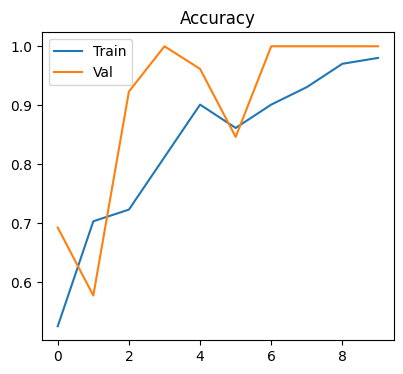

In [27]:
# Plot Results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

### Predict on Holdout

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step

--- Prediction Result ---
Image File:      020790.000001-raw.png
True Label:      62
Predicted Label: 62
Confidence:      78.54%


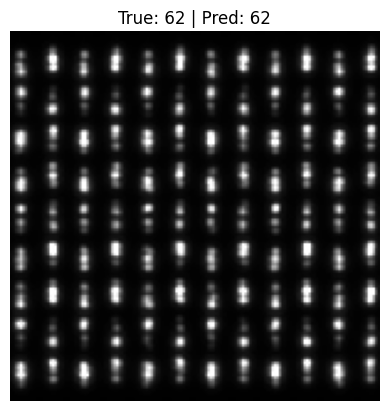

In [28]:
# Load the specific holdout image
img_path = os.path.join(DATA_DIR, holdout_row['filename'])
img = keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)

# Preprocess
x = keras.preprocessing.image.img_to_array(img)
X = np.array([x])
X = preprocess_input(X)

# Predict
pred_probs = model.predict(X)
pred_idx = np.argmax(pred_probs)

# Map index back to class label
labels_map = dict((v,k) for k,v in train_ds.class_indices.items())
predicted_label = labels_map[pred_idx]
confidence = np.max(pred_probs) * 100

print(f"\n--- Prediction Result ---")
print(f"Image File:      {holdout_row['filename']}")
print(f"True Label:      {holdout_row['label']}")
print(f"Predicted Label: {predicted_label}")
print(f"Confidence:      {confidence:.2f}%")

plt.imshow(img)
plt.axis('off')
plt.title(f"True: {holdout_row['label']} | Pred: {predicted_label}")
plt.show()

### Summary of HW2 Item-12: Image Classification
1. Data Preparation

* Source: Atomagined dataset (Small subset from GitHub).

* Matching: Matched 128 images to the CSV using the ref_id (stripping leading zeros).

* Classes: The subset contained 2 distinct symmetry classes.

* Split: 80% Training (101 images), 20% Validation (26 images).

2. Model Architecture

* Base: Xception (Pre-trained on ImageNet), weights frozen.

* Head: GlobalAveragePooling2D → Dense(128, relu) → Dropout(0.5) → Dense(Softmax).

* Regularization: Used Dropout (0.5) and Data Augmentation (Rotation, Shifts, Flips) to prevent overfitting on the small dataset.

3. Results

* Validation Accuracy: Reached 100% by Epoch 4.

* Holdout Prediction:

* File: 020790.000001-raw.png

* True Class: 62

* Predicted Class: 62

* Confidence: ~78.5%